In [ ]:
#ifif using colab
# ! pip install hmmlearn
# ! pip install yfinance

     |████████████████████████████████| 374 kB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 6.0 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# Packages and Data Split

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.regime_switching.markov_autoregression import MarkovAutoregression
import numpy as np
from hmmlearn import hmm
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# def  model_function(train_data -> np.array, num_of_predictions -> int):

# 	Return prediction 

In [ ]:
aapl = yf.download("AAPL", start="2010-01-01", end="2021-10-31").reset_index()
aapl.Date = pd.to_datetime(aapl.Date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
daily_return = aapl['Return'] = aapl.Close.pct_change().dropna()

#(np.log(aapl.Close /aapl.Close.shift(-1))).dropna()
# np.log(aapl.Close.pct_change()).dropna()

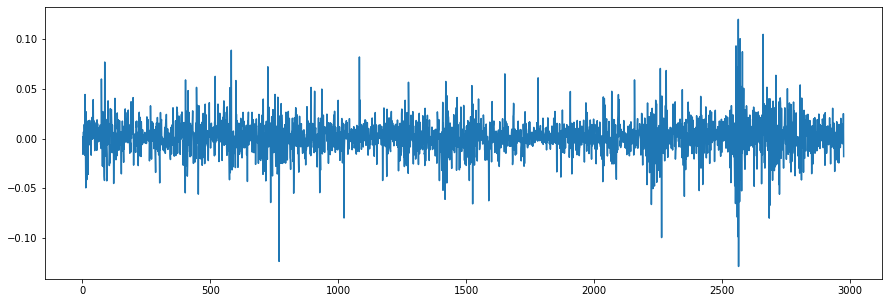

In [ ]:
plt.plot(daily_return)

# HMM 

In [ ]:
# train,test = aapl[aapl.Date<'2021-01-01'],aapl[aapl.Date>='2021-01-01']
train,test = daily_return[:2800],daily_return[2800:]

In [ ]:
train_np = np.array(train).reshape(-1,1)
test_np = np.array(test).reshape(-1,1)

In [ ]:
remodel = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
remodel.fit(train_np)

GaussianHMM(covariance_type='full', n_components=3, n_iter=1000)

In [ ]:
plot_data = train_np
predict_state = remodel.predict(plot_data)

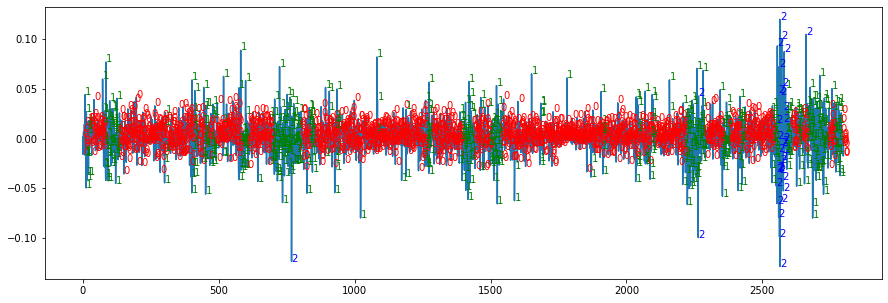

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(plot_data)
color_set = ['r','g','b']
for i, txt in enumerate(predict_state):
    plt.annotate(int(txt), (i, plot_data[i]),c=color_set[int(txt)])

In [ ]:
hmm_prediction = remodel.sample(len(test_np),random_state = predict_state[-1])
hmm_prediction_value = hmm_prediction[0]
hmm_prediction_states = hmm_prediction[1]

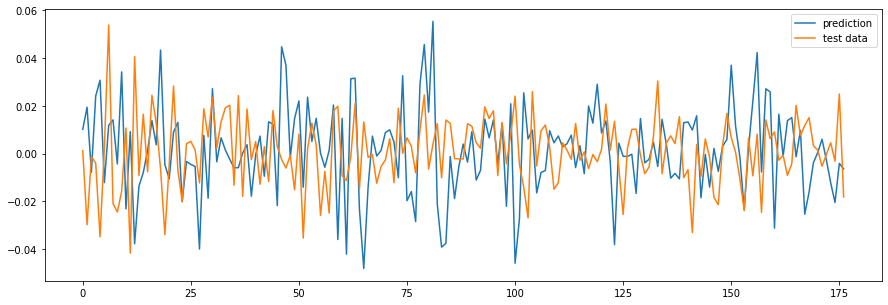

In [ ]:
plt.plot(hmm_prediction_value,label = 'prediction')
plt.plot(test_np, label = 'test data')
plt.legend()

In [ ]:
mean_absolute_percentage_error(test_np,hmm_prediction_value)

5.517757327394471

In [ ]:
mean_squared_error(test_np,hmm_prediction_value)

0.0008351536941600156

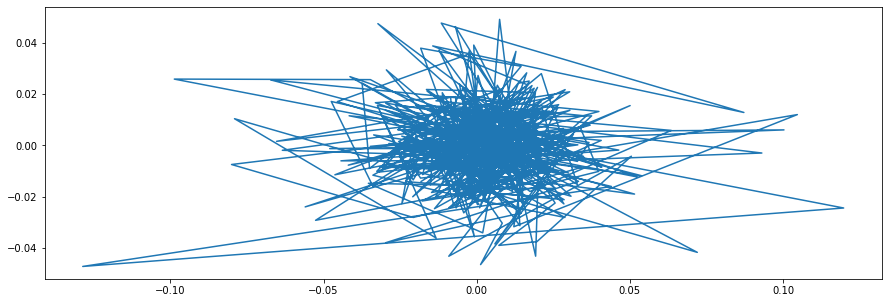

In [ ]:
plt.plot(test_np,hmm_prediction_value)

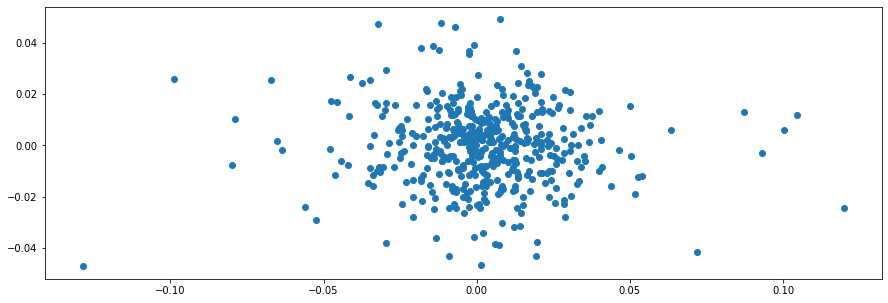

In [ ]:
plt.scatter(test_np,hmm_prediction_value)